# Single Predictor Variable Logistic Regressions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
from loan_approval_lib.standard_data_processing import data_cleaning_algorithm

In [5]:
data = loan_approval_lib.load_original_data()

In [6]:
data_test = loan_approval_lib.load_data_test()

# Data Cleaning

In [7]:
data = data_cleaning_algorithm(data)

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# Library Code

In [99]:
def logistic_regression_model_train(
    data_train,
    columns,
):
    
    #x = data[column].to_numpy().reshape(-1, 1)
    x = data[columns]
    #y = data['loan_status'].to_numpy()
    y = data['loan_status']
    
    model = sklearn.linear_model.LogisticRegression(max_iter=1000)
    clf = model.fit(x, y)
    
    clf_score = clf.score(x, y)

    return (clf, clf_score)

In [73]:
def logistic_regression_model_predict_proba(
    clf,
    data_test,
    columns,
):

    X_test = data_test[columns].copy()

    Z_test = clf.predict_proba(X_test)[:, 1]

    return Z_test

In [10]:
def plot_logistic_regression(
    filename,
    column,
    x_min, x_max, x_steps,
    y_min, y_max,
    y2_min, y2_max,
    legend_loc,
):
    data_accept = data[data['loan_status'] == 0]
    data_reject = data[data['loan_status'] == 1]
    
    _min = min(data_accept[column].min(), data_reject[column].min())
    _max = max(data_accept[column].max(), data_reject[column].max())
    _steps = _max - _min
    print(f'auto: min={_min} max={_max}, steps={_steps}')

    # overrides
    if x_min is not None:
        _min = x_min
    if x_max is not None:
        _max = x_max
    if x_steps is not None:
        _steps = x_steps
    else:
        _steps = _max - _min
    
    # create ratio histogram data
    bins = numpy.linspace(_min, _max, _steps)
    h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
    h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
    h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
    nan_index = numpy.isnan(h_data_ratio)
    h_data_ratio[nan_index] = 0.0

    # plot ratio histogram
    lines1 = plt.step(
        bins_reject,
        numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
        label='data',
        color='tab:blue',
        linewidth=2,
    )
    plt.xlabel(column)
    plt.ylabel('P(reject) (data)')
    plt.ylim(y_min, y_max)

    (clf, clf_score) = logistic_regression_model_train(
        data,
        [column],
    )
    
    #x_min = _min
    #x_max = _max
    xx = numpy.linspace(x_min, x_max, 100)

    # plot logistic curve
    plt.twinx()
    lines2 = plt.plot(
        xx,
        clf.predict_proba(xx.reshape(-1, 1))[:, 1],
        label='logistic model',
        color='tab:green',
        linewidth=2,
    )
    plt.ylabel('P(reject) (model)')
    plt.xlim(_min, _max)
    if y2_min is None:
        y2_min = y_min
    if y2_max is None:
        y2_max = y_max
    plt.ylim(y2_min, y2_max)
    lines = lines1 + lines2
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc=legend_loc)
    plt.savefig(filename)

    return (clf, clf_score)

# Perform Logistic Regression for all Numerical Columns

In [11]:
# save data for ROC figure in this dictionary

data_by_column = {}

## Person Age

In [12]:
column='person_age'

auto: min=20 max=84, steps=64


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7833892148644873


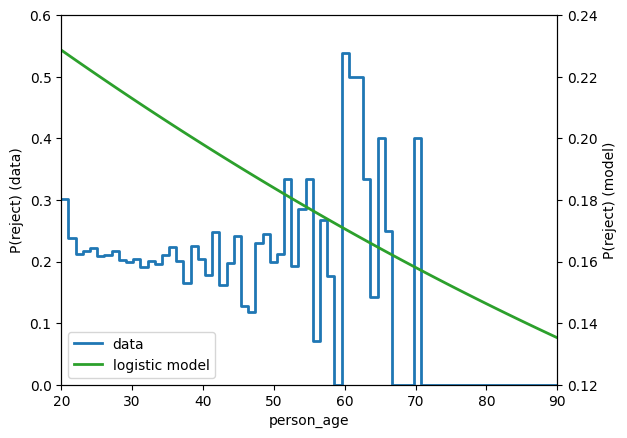

In [13]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=20, x_max=90, x_steps=None,
    y_min=0.0, y_max=0.6,
    y2_min=0.12, y2_max=0.24,
    legend_loc='lower left',
)

print(f'clf score: {clf_score}')

In [14]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [15]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Person Income

In [16]:
column='person_income'

auto: min=4000 max=2039784, steps=2035784


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7833892148644873


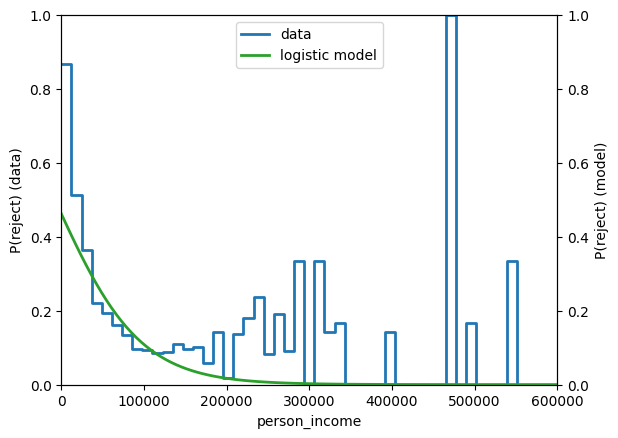

In [17]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=6.0e+5, x_steps=50,
    y_min=0.0, y_max=1.0,
    y2_min=None, y2_max=None,
    legend_loc='upper center',
)

print(f'clf score: {clf_score}')

In [18]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [19]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Person Employment Length

In [20]:
column='person_emp_length'

auto: min=0.0 max=41.0, steps=41.0


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7833892148644873


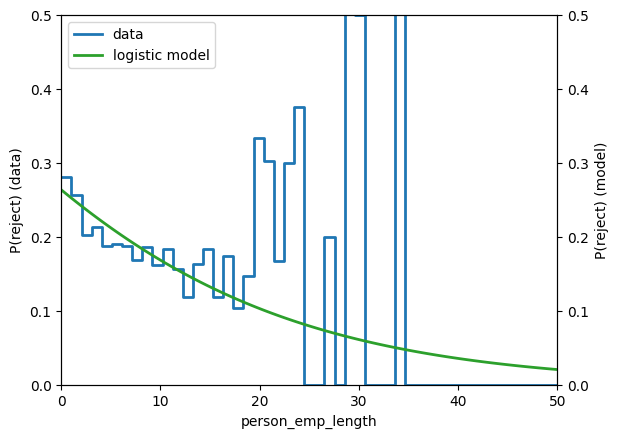

In [21]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=50, x_steps=50,
    y_min=0.0, y_max=0.5,
    y2_min=None, y2_max=None,
    legend_loc='upper left',
)

print(f'clf score: {clf_score}')

In [22]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [23]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Loan Amount

In [24]:
column='loan_amnt'

auto: min=500 max=35000, steps=34500


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7833892148644873


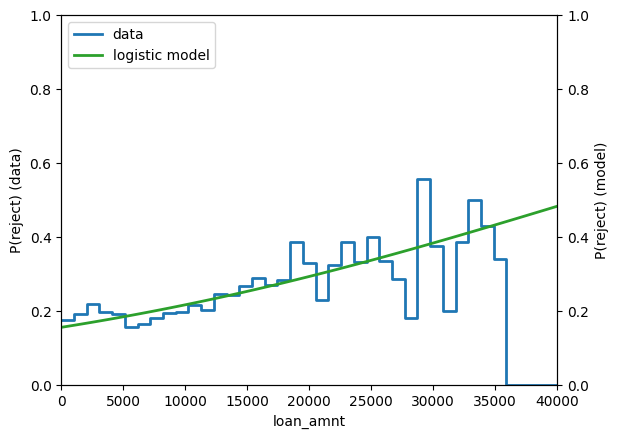

In [25]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=40000, x_steps=40,
    y_min=0.0, y_max=1.0,
    y2_min=None, y2_max=None,
    legend_loc='upper left',
)

print(f'clf score: {clf_score}')

In [26]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [27]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Loan Interest Rate

In [28]:
column='loan_int_rate'

auto: min=5.42 max=23.22, steps=17.799999999999997


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7969055602123498


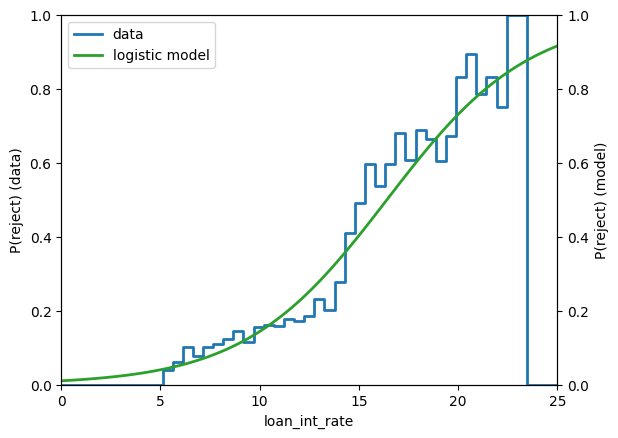

In [29]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=25, x_steps=50,
    y_min=0.0, y_max=1.0,
    y2_min=None, y2_max=None,
    legend_loc='upper left',
)

print(f'clf score: {clf_score}')

In [30]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [31]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Loan Percent Income

In [32]:
column='loan_percent_income'

auto: min=0.0 max=0.83, steps=0.83


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.8147177982676725


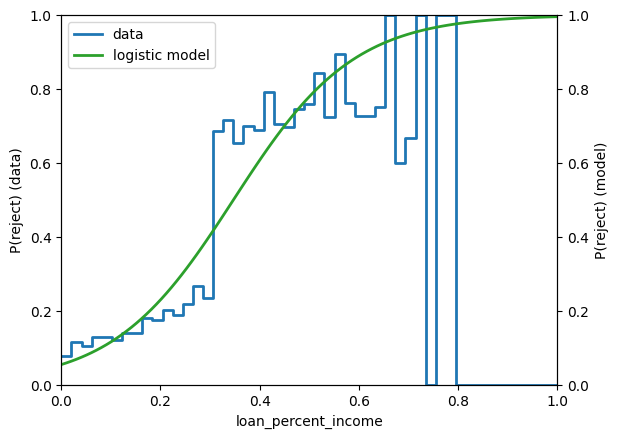

In [33]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=1, x_steps=50,
    y_min=0.0, y_max=1.0,
    y2_min=None, y2_max=None,
    legend_loc='upper left',
)

print(f'clf score: {clf_score}')

In [34]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [35]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

### Credit History Length

In [36]:
column='cb_person_cred_hist_length'

auto: min=2 max=30, steps=28


/tmp/ipykernel_5031/1897864818.py:31: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
/home/edward/Jupyter/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


clf score: 0.7833892148644873


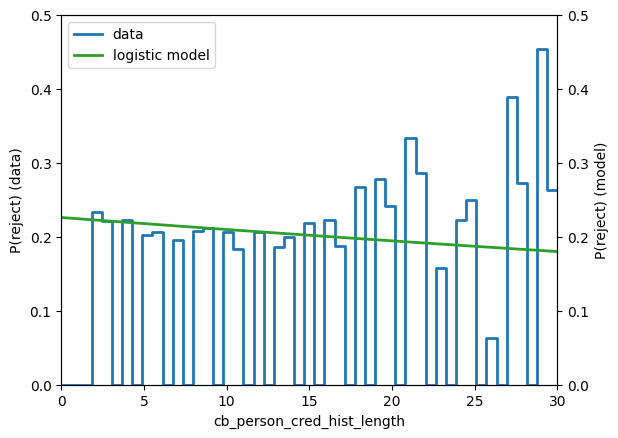

In [40]:
(clf, clf_score) = plot_logistic_regression(
    filename=f'single_predictor_logistic-ROC-2-logistic_{column}.pdf',
    column=column,
    x_min=0.0, x_max=30, x_steps=50,
    y_min=0.0, y_max=0.5,
    y2_min=None, y2_max=None,
    legend_loc='upper left',
)

print(f'clf score: {clf_score}')

In [41]:
(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    logistic_regression_model_predict_proba(clf, data, column),
)

auc_ = auc(roc_fpr, roc_tpr)

In [42]:
data_by_column[column] = {
    'clf': clf,
    'clf_score': clf_score,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_threshold': roc_threshold,
    'auc': auc_,
}

In [47]:
list(data_by_column.keys())

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

# Plot ROC

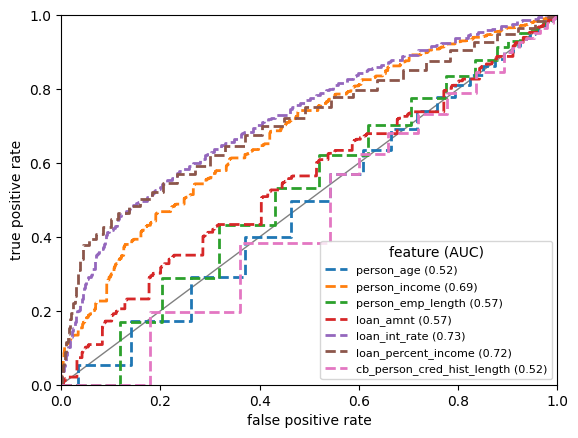

In [92]:
plt.figure()

plt.plot([0.0, 1.0], [0.0, 1.0], color='grey', linewidth=1)

#for ii in [0, 1, 2, 4, 9, 11, 14, 24]:
#    jj = 100 * ii
#    max_depth_ = max_depth_list_input[ii]
#    #auc_ = df[df['max_depth'] == max_depth_]['auc']
#    auc_ = auc_list[jj]
#    if max_depth_ == 10:
#        plt.step(fpr_list[jj], tpr_list[jj], where='post', linewidth=2, linestyle='solid',
#                 label=f'{max_depth_} (AUC={auc_:.2f})')
#    else:
#        plt.step(fpr_list[jj], tpr_list[jj], where='post', linewidth=2, linestyle='dashed',
#                 label=f'{max_depth_} (AUC={auc_:.2f})')
#plt.fill_between(
#    roc_curve_fpr,
#    roc_curve_tpr,
#    alpha=0.2,
#)

for key, value in data_by_column.items():

    column = key
    
    roc_fpr = value['roc_fpr']
    roc_tpr = value['roc_tpr']

    auc_ = value['auc']
    
    plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='dashed',
             label=f'{column} ({auc_:.2f})')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

#plt.text(
#    0.60,
#    0.95,
#    f'AUC = {roc_auc:.2f}',
#    transform=plt.gca().transAxes,
#    fontsize=12,
#    verticalalignment='top',
#)

plt.legend(fontsize=8, title='feature (AUC)')

#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_multi_publication.png')
#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_mulit_publication.pdf')
plt.savefig('single_predictor_logistic-ROC-2-single_predictors.pdf')

None

# Plot ROC trivial guess

In [86]:
data_trivial_model = data[['person_age']].copy()
data_trivial_model['predict_proba'] = 0.0
data_trivial_model.drop(columns=['person_age'], inplace=True)
data_trivial_model = data_trivial_model.to_numpy()

(roc_fpr, roc_tpr, roc_threshold) = roc_curve(
    data['loan_status'],
    data_trivial_model,
)

auc_ = auc(roc_fpr, roc_tpr)

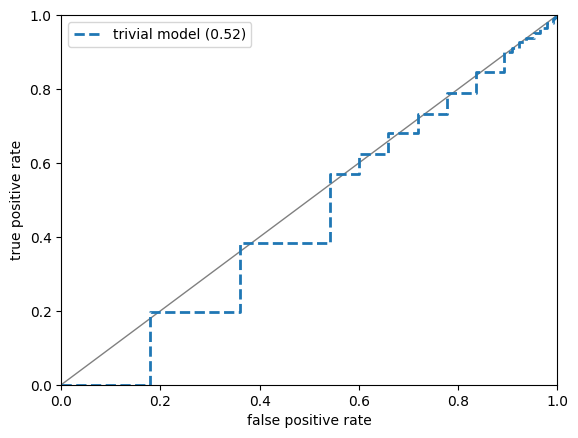

In [91]:
plt.figure()

plt.plot([0.0, 1.0], [0.0, 1.0], color='grey', linewidth=1)

column = 'none'
    
roc_fpr = value['roc_fpr']
roc_tpr = value['roc_tpr']

auc_ = value['auc']
    
plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='dashed',
         label=f'trivial model ({auc_:.2f})')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

#plt.legend(fontsize=10, title='feature (AUC)')
plt.legend(fontsize=10)

#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_multi_publication.png')
plt.savefig('single_predictor_logistic-ROC-2-trivial_model.pdf')

None

# 2 Dimensional Logistic Regression Model

In [67]:
logstic_regression_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
]

In [68]:
feature_pairs = list(itertools.combinations(logstic_regression_columns, 2))

In [69]:
data_by_column_2d = {}

In [80]:
auc_maximum = None
auc_maximum_index = None

for feature_pair in feature_pairs:

    column_1 = feature_pair[0]
    column_2 = feature_pair[1]

    columns = [column_1, column_2]
    
    (clf, clf_score) = logistic_regression_model_train(
        data,
        columns,
    )

    (roc_fpr, roc_tpr, roc_threshold) = roc_curve(
        data['loan_status'],
        logistic_regression_model_predict_proba(clf, data, columns),
    )
    
    auc_ = auc(roc_fpr, roc_tpr)

    columns_tuple = (column_1, column_2)
    data_by_column_2d[columns_tuple] = {
        'clf': clf,
        'clf_score': clf_score,
        'roc_fpr': roc_fpr,
        'roc_tpr': roc_tpr,
        'roc_threshold': roc_threshold,
        'auc': auc_,
    }

    if auc_maximum is None:
        auc_maximum = auc_
        auc_maximum_index = columns_tuple
    if auc_ > auc_maximum:
        auc_maximum = auc_
        auc_maximum_index = columns_tuple

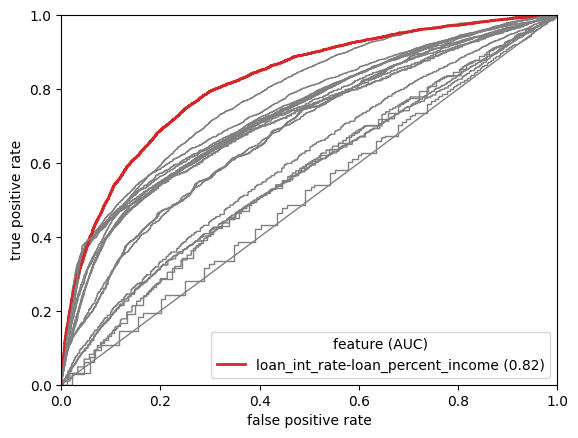

In [94]:
plt.figure()

plt.plot([0.0, 1.0], [0.0, 1.0], color='grey', linewidth=1)

for key, value in data_by_column_2d.items():

    columns = key

    column_1 = columns[0]
    column_2 = columns[1]
    
    roc_fpr = value['roc_fpr']
    roc_tpr = value['roc_tpr']

    auc_ = value['auc']
    
    #plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='dashed',
    #         label=f'{column_1}-{column_2} ({auc_:.2f})')

    columns_tuple = (column_1, column_2)
    if columns_tuple == auc_maximum_index:
        plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='solid', color='tab:red',
                 label=f'{column_1}-{column_2} ({auc_:.2f})')
    else:
        plt.step(roc_fpr, roc_tpr, where='post', linewidth=1, linestyle='solid', color='grey')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.legend(fontsize=10, title='feature (AUC)')

#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_multi_publication.png')
#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_mulit_publication.pdf')
plt.savefig('single_predictor_logistic-ROC-2-2_predictors.pdf')

None

# 3 Dimensional Logistic Regression Model

In [96]:
feature_combinations = list(itertools.combinations(logstic_regression_columns, 3))

In [97]:
data_by_column_3d = {}

In [100]:
auc_maximum_3d = None
auc_maximum_index_3d = None

for feature_combination in feature_combinations:

    column_1 = feature_combination[0]
    column_2 = feature_combination[1]
    column_3 = feature_combination[2]

    columns = [column_1, column_2, column_3]
    
    (clf, clf_score) = logistic_regression_model_train(
        data,
        columns,
    )

    (roc_fpr, roc_tpr, roc_threshold) = roc_curve(
        data['loan_status'],
        logistic_regression_model_predict_proba(clf, data, columns),
    )
    
    auc_ = auc(roc_fpr, roc_tpr)

    columns_tuple = (column_1, column_2, column_3)
    data_by_column_3d[columns_tuple] = {
        'clf': clf,
        'clf_score': clf_score,
        'roc_fpr': roc_fpr,
        'roc_tpr': roc_tpr,
        'roc_threshold': roc_threshold,
        'auc': auc_,
    }

    if auc_maximum_3d is None:
        auc_maximum_3d = auc_
        auc_maximum_3d_index = columns_tuple
    if auc_ > auc_maximum_3d:
        auc_maximum_3d = auc_
        auc_maximum_3d_index = columns_tuple

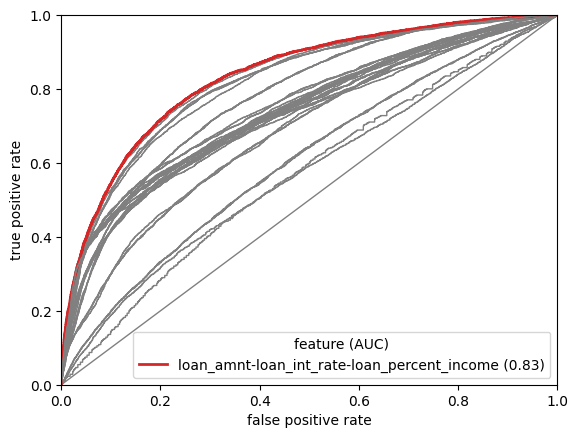

In [102]:
plt.figure()

plt.plot([0.0, 1.0], [0.0, 1.0], color='grey', linewidth=1)

for key, value in data_by_column_3d.items():

    columns = key

    column_1 = columns[0]
    column_2 = columns[1]
    column_3 = columns[2]
    
    roc_fpr = value['roc_fpr']
    roc_tpr = value['roc_tpr']

    auc_ = value['auc']
    
    #plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='dashed',
    #         label=f'{column_1}-{column_2} ({auc_:.2f})')

    columns_tuple = (column_1, column_2, column_3)
    if columns_tuple == auc_maximum_3d_index:
        plt.step(roc_fpr, roc_tpr, where='post', linewidth=2, linestyle='solid', color='tab:red',
                 label=f'{column_1}-{column_2}-{column_3} ({auc_:.2f})')
    else:
        plt.step(roc_fpr, roc_tpr, where='post', linewidth=1, linestyle='solid', color='grey')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.legend(fontsize=10, title='feature (AUC)')

#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_multi_publication.png')
#plt.savefig('decision_tree_model_by_max_depth-ROC_curves_mulit_publication.pdf')
plt.savefig('single_predictor_logistic-ROC-2-3_predictors.pdf')

None

# old stuff

In [44]:
# example
threshold = 0.5
data_copy_['loan_status_predict'] = (data_copy_['predict_proba'] > threshold).astype(int)
accuracy = (data_copy_['loan_status_predict'] == data_copy_['loan_status']).sum() / len(data_copy_)
accuracy

np.float64(0.8147177982676725)

In [76]:
def calc_accuracy(threshold):
    data_copy_['loan_status_predict'] = (data_copy_['predict_proba'] > threshold).astype(int)
    accuracy = (data_copy_['loan_status_predict'] == data_copy_['loan_status']).sum() / len(data_copy_)
    return accuracy

In [77]:
thresholds = numpy.linspace(0.0, 1.0, 100)
accuracy_ = numpy.array(
    [
        calc_accuracy(threshold) for threshold in thresholds
    ]
)

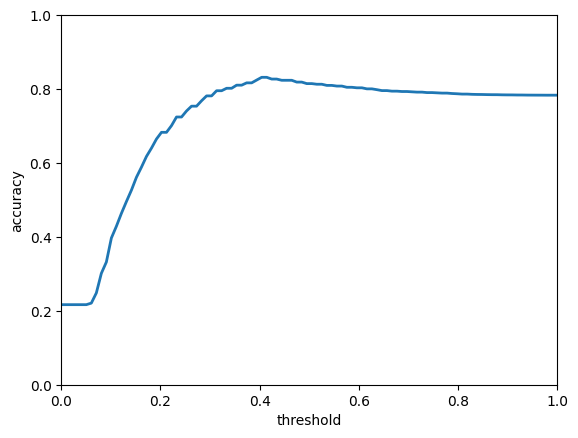

In [60]:
plt.figure()

plt.plot(
    thresholds,
    accuracy_,
    linewidth=2,
)

plt.ylabel('accuracy')
plt.xlabel('threshold')

plt.xlim(xmin=0.0, xmax=1.0)
plt.ylim(ymin=0.0, ymax=1.0)

None